In [42]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("healthcare_dataset.csv")

In [19]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [20]:
df.shape

(55500, 15)

In [21]:
df.info

<bound method DataFrame.info of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith           

In [22]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [23]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [24]:
df.duplicated().sum()

534

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.drop(columns=['Name', 'Doctor','Room Number','Hospital'], inplace=True)

In [27]:
df.head()

Age  Gender Blood Type Medical Condition Date of Admission  \
0   30    Male         B-            Cancer        2024-01-31   
1   62    Male         A+           Obesity        2019-08-20   
2   76  Female         A-           Obesity        2022-09-22   
3   28  Female         O+          Diabetes        2020-11-18   
4   43  Female        AB+            Cancer        2022-09-19   

  Insurance Provider  Billing Amount Admission Type Discharge Date  \
0         Blue Cross    18856.281306         Urgent     2024-02-02   
1           Medicare    33643.327287      Emergency     2019-08-26   
2              Aetna    27955.096079      Emergency     2022-10-07   
3           Medicare    37909.782410       Elective     2020-12-18   
4              Aetna    14238.317814         Urgent     2022-10-09   

    Medication  Test Results  
0  Paracetamol        Normal  
1    Ibuprofen  Inconclusive  
2      Aspirin        Normal  
3    Ibuprofen      Abnormal  
4   Penicillin      Abnormal

In [32]:
gender_map = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_map)

In [34]:
df['Blood Type'].nunique()

8

In [35]:
blood_type_map = {'A+': 1, 'A-': 2, 'B+': 3, 'B-': 4, 'AB+': 5, 'AB-': 6, 'O+': 7, 'O-': 8}
df['Blood Type'] = df['Blood Type'].map(blood_type_map)

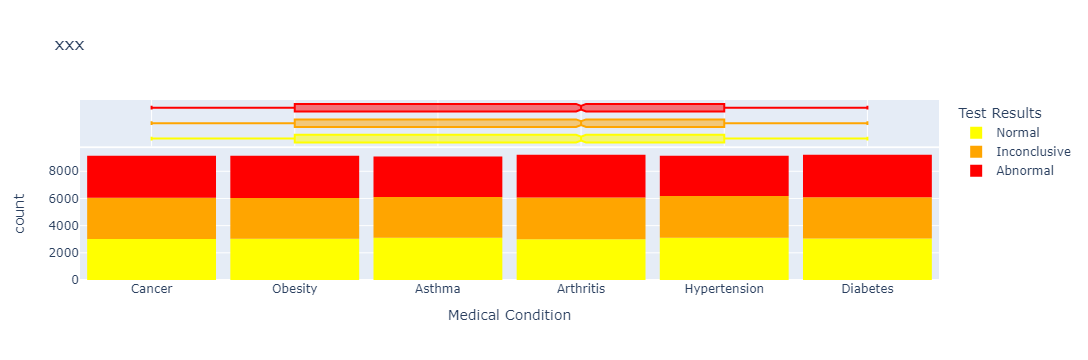

In [47]:
fig = px.histogram(df, 
                   x='Medical Condition',
                   marginal='box', 
                   color='Test Results', 
                   color_discrete_sequence=['yellow', 'orange','red'],
                   title='')
fig.update_layout(bargap=0.1)
fig.show()

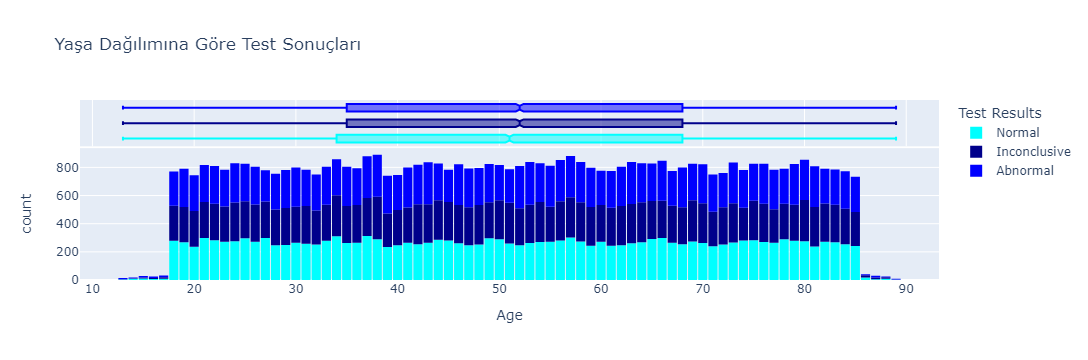

In [49]:
fig = px.histogram(df, 
                   x='Age',
                   marginal='box', 
                   color='Test Results', 
                   color_discrete_sequence=['aqua', 'darkblue','blue'],
                   title='Yaşa Dağılımına Göre Test Sonuçları')
fig.update_layout(bargap=0.1)
fig.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Billing Amount', ylabel='Count'>

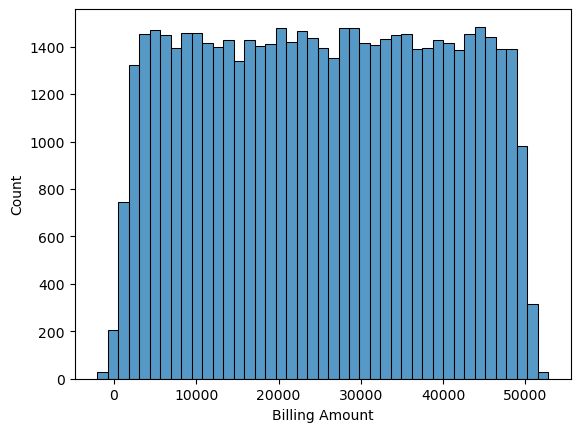

In [51]:
sns.histplot(data=df, x='Billing Amount')

In [56]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [57]:
df['Days of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [58]:
df

Age  Gender  Blood Type Medical Condition Date of Admission  \
0       30       1           4            Cancer        2024-01-31   
1       62       1           1           Obesity        2019-08-20   
2       76       0           2           Obesity        2022-09-22   
3       28       0           7          Diabetes        2020-11-18   
4       43       0           5            Cancer        2022-09-19   
...    ...     ...         ...               ...               ...   
55495   42       0           7            Asthma        2020-08-16   
55496   61       0           6           Obesity        2020-01-23   
55497   38       0           3      Hypertension        2020-07-13   
55498   43       1           8         Arthritis        2019-05-25   
55499   53       0           7         Arthritis        2024-04-02   

      Insurance Provider  Billing Amount Admission Type Discharge Date  \
0             Blue Cross    18856.281306         Urgent     2024-02-02   
1               Medicare    33643.327287      Emergency     2019-08-26   
2                  Aetna    27955.096079      Emergency     2022-10-07   
3               Medicare    37909.782410       Elective     2020-12-18   
4                  Aetna    14238.317814         Urgent     2022-10-09   
...                  ...             ...            ...            ...   
55495         Blue Cross     2650.714952       Elective     2020-09-15   
55496              Cigna    31457.797307       Elective     2020-02-01   
55497   UnitedHealthcare    27620.764717         Urgent     2020-08-10   
55498           Medicare    32451.092358       Elective     2019-05-31   
55499              Aetna     4010.134172         Urgent     2024-04-29   

        Medication  Test Results  Days of Stay  
0      Paracetamol        Normal             2  
1        Ibuprofen  Inconclusive             6  
2          Aspirin        Normal            15  
3        Ibuprofen      Abnormal            30  
4       Penicillin      Abnormal            20  
...            ...           ...           ...  
55495   Penicillin      Abnormal            30  
55496      Aspirin        Normal             9  
55497    Ibuprofen      Abnormal            28  
55498    Ibuprofen      Abnormal             6  
55499    Ibuprofen      Abnormal            27  

[54966 rows x 12 columns]

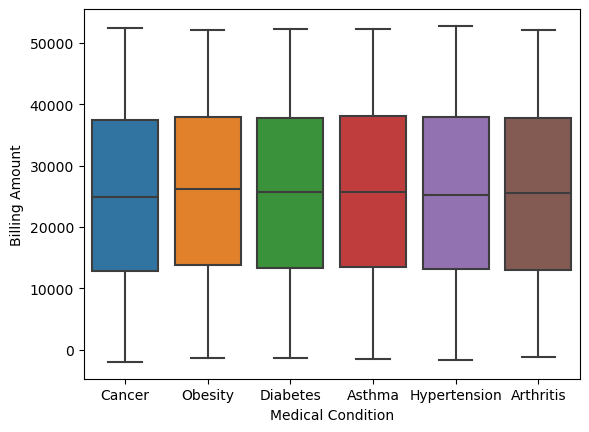

In [85]:
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.show()